# 0 What we learned in the last session:

Basic process:

#### 1. Choose the unit of analysis - break up the corpus into discrete documents

+ Document: measure topics and sentiments from newspaper articles/social media/articles

+ Sentences: headlines and paragrahs, for expository purposes

#### 2. Tokenize - split documents into words

Each individual word in the document is a token  

The process of splitting a document into its constituent words is called tokenization.  

Tokens are the individual units we split our documents into before counting them up. 

#### word segmentation

In languages such as Chinese, Japanese, words are not seperated by spaces. For these languages we need a model, called a word segmentatation model, to split the characters into their constituent words.

#### N-grams

a sequence of N words

#### 3. Reduce complexity (Lowercase, remove stopwords, lemmatize/stem, filter by frequency)  

+ Lowercase: replace all capital letters with lowercase letters. 

</br>

+ Remove stopwords: researchers might decide what words to be removed, words that do not give much information about the task. For example, words such as *and*, *the* may be removed to reduce the size and complexity.

</br>

+ Lemmatize/stem: There are still many words that may carry the same information because they share a common root. Lemmatization is the process of mapping words to their lemma, i.e.,cut the words into their root words ( e.g., see, saw, seen).Stemming simply discard the end of a word (e.g., family to famili), i.e., replace or remove the suffixes and affixes. 

</br>

+ Filter by frequency: Create the document-feature matrix to remove the words that are very rare or have incredibly high frequency. 


4. Create the document - feature matrix



#### Regular expressions

A Regular Expressions (RegEx) is a special sequence of characters that uses a search pattern to find a string or set of strings. 

It can detect the presence or absence of a text by matching with a particular pattern, and also can split a pattern into one or more sub-patterns.

+ **Caret (^)** symbol matches the beginning of the string i.e. checks whether the string starts with the given character(s) or not.$ matches the end 

</br>

+ Square Brackets ([]) represents a character class consisting of a set of characters that we wish to match.

</br>

+ Plus (+) symbol matches one or more occurrences of the regex preceding the + symbol.

</br>

+ \s: Matches any whitespace character. \d: Matches any decimal digit, this is equivalent to the set class [0-9]

</br>

+ [a-z0-9]: It matches any character given in the a-z or 0-9.

^[a-zA-Z]: match all strings that start with a letter

[^a-zA-Z]: match all strings that contain a non-letter

[a-zA-z]+: find all the alphabet letter, both uppercase and lowercase

# 1 Representing text

All machine learning or deep learning models are limited because they 
cannot understand text data directly and they only understand numeric representations 
of features as inputs.

To work with texts and gain insights, we need to represent the documents in a way for the computer to process it.

To convert the text data into numerical data, we need some smart ways which are known as **vectorization**, or in the NLP world, it is known as **Word embeddings**.

In this manner, we say this as extracting features with the help of text with an aim to build multiple natural languages, processing models, etc. Typically, this is done via representing documents as **feature vectors**.

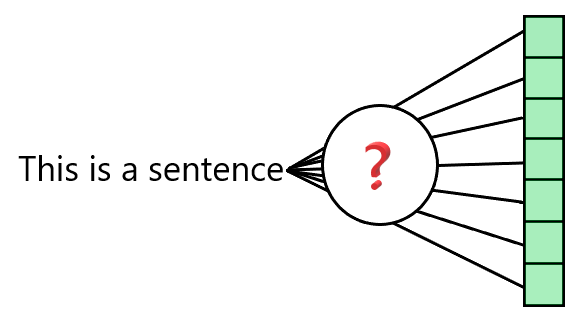



Feature is the name given to selected or treated data that is prepared to be used as input to algorithms (usually Machine Learning Algorithms). Features can be things like the price of a house, the RGB value of a pixel or, in our case, **the representation of a word**.

So, ultimately, our objective is to get the raw data (text) and turn into features (something computer algorithms can work with).


## Review some Terminologies

A ***corpus*** is typically a collection of text documents usually  belonging to one or more subjects or topics.   

Every unique word in the corpus is considered as a ***feature***.  

#### For example:

**Sentences**:

Dog hates a cat. It loves to go out and play.

</br>

Cat loves to play with a ball.

**We can build a corpus from the above 2 documents just by combining them:**  

Corpus = “Dog hates a cat. It loves to go out and play. Cat loves to play with a ball.”  

**And features will be all unique words:** 

Fetaures: [‘and’, ‘ball’, ‘cat’, ‘dog’, ‘go’, ‘hates’, ‘it’, ‘loves’, ‘out’, ‘play’, ‘to’, ‘with’]

We will call it a feature vector. 


#### Matrix

After you choose how to represent each document in your corpus, you end up with a bunch of vectors.   

Put those vectors on top of each other, and you have a matrix.  

Irrespective of the type of representation we choose (sparse or dense), it makes sense to think of the data in terms of **matrices and vectors**.

A **vector** is an ordered collection of D dimensions with numbers in them. 

A **matrix** is a collection of N vectors, where each row represents one document, and the columns represent the features mentioned above, or the dimensions in the embedding space.

When we refer to the data matrix in the following, we mean a matrix with one row for each document, and as many columns as we have features or dimensions in our representation.

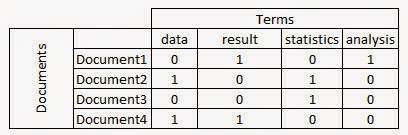

#### Some representation ways:

+ Frequency-based or Statistical based Word Embedding (classical)  

+ Prediction based Word Embedding

### This session will cover a wide variety of techniques for feature engineering to represent text data:



+ Bag of Words model

</br>

+ Bag of N-Grams model

</br>

+ TF-IDF model

</br>

+ Similarity features

+ Word2Vec

</br>

### Potentially useful library documentation, references, and resources:

+ IPython notebooks: https://ipython.org/ipython-doc/3/notebook/notebook.html#introduction
+ Numpy numerical array library: https://docs.scipy.org/doc/
+ Gensim's word2vec: https://radimrehurek.com/gensim/models/word2vec.html
+ Bokeh interactive plots: http://bokeh.pydata.org/en/latest/ (we provide plotting code here, but click the thumbnails for more examples to copy-paste)
+ scikit-learn ML library (aka sklearn): http://scikit-learn.org/stable/documentation.html
+ nltk NLP toolkit: http://www.nltk.org/


# 2 Traditional Feature Engineering Models


Traditional (count-based) feature engineering strategies for textual data belong to 
a family of models popularly known as the Bag of Words model.   

This includes term 
frequencies, TF-IDF (term frequency-inverse document frequency), N-grams, topic 
models, and so on.   

While they are effective methods for extracting features from text, 
due to the inherent nature of the model being just a bag of unstructured words, we lose 
additional information like the semantics, structure, sequence, and context around 
nearby words in each text document. 




#### Prepare sample corpus

Let’s now build a sample corpus of documents on which we will run




In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

pd.options.display.max_colwidth = 200
%matplotlib inline

In [2]:
corpus = ['The sky is blue and beautiful.',
          'Love this blue and beautiful sky!',
          'The quick brown fox jumps over the lazy dog.',
          "A king's breakfast has sausages, ham, bacon, eggs, toast and beans",
          'I love green eggs, ham, sausages and bacon!',
          'The brown fox is quick and the blue dog is lazy!',
          'The sky is very blue and the sky is very beautiful today',
          'The dog is lazy but the brown fox is quick!'    
]
labels = ['weather', 'weather', 'animals', 'food', 'food', 'animals', 'weather', 'animals']

# numpy.array: create a new array

corpus = np.array(corpus)

# pd. DataFrame: Two-dimensional, size-mutable, potentially heterogeneous tabular data.
# syntax- pandas.DataFrame( data, index, columns, dtype, copy)

corpus_df = pd.DataFrame({'Document': corpus, 
                          'Category': labels})
corpus_df = corpus_df[['Document', 'Category']]
corpus_df

,Document,Category
0,The sky is blue and beautiful.,weather
1,Love this blue and beautiful sky!,weather
2,The quick brown fox jumps over the lazy dog.,animals
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food
4,"I love green eggs, ham, sausages and bacon!",food
5,The brown fox is quick and the blue dog is lazy!,animals
6,The sky is very blue and the sky is very beautiful today,weather
7,The dog is lazy but the brown fox is quick!,animals


#### More about pd.DataFrame

pandas.DataFrame(data, index, columns, dtype, copy)

In [90]:
# data could also be a list

data_test1 = [['Google',10],['Runoob',12],['Wiki',13]]

df_test1 = pd.DataFrame(data_test1,columns=['Site','Age'],dtype=float)

print(df_test1)

     Site   Age
0  Google  10.0
1  Runoob  12.0
2    Wiki  13.0


In [91]:
corpus_df.describe()

,Document,Category
count,8,8
unique,8,3
top,The brown fox is quick and the blue dog is lazy!,weather
freq,1,3


In [92]:
corpus_df.head()

,Document,Category
0,The sky is blue and beautiful.,weather
1,Love this blue and beautiful sky!,weather
2,The quick brown fox jumps over the lazy dog.,animals
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food
4,"I love green eggs, ham, sausages and bacon!",food


#### Preprocessing the corpus

Since the focus of this article is on feature engineering, we build a simple text 
preprocessor that focuses on removing special characters, extra whitespace, digits, 
stopwords, and then lowercasing the text corpus.

In [3]:
# nltk.WordPunctTokenizer(): return the tokens from a string of alphabetic or non-alphabetic character

wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

# re.sub = sub(pattern, repl, string, count=0, flags=0)

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()  # remove whitespace
    
    # tokenize document
    
    tokens = wpt.tokenize(doc)
    
    # filter stopwords out of document
    
    filtered_tokens = [token for token in tokens if token not in stop_words]
    
    # re-create document from filtered tokens
    
    doc = ' '.join(filtered_tokens)
    
    return doc

# np.vectorize is just a convenience function.

# The purpose of np.vectorize is to transform functions which are not numpy-aware 
# (e.g. take floats as input and return floats as output) into functions that can operate on (and return) numpy arrays.

normalize_corpus = np.vectorize(normalize_document)

In [4]:
'''
Once we have our basic preprocessing pipeline ready, 
let’s apply it to our sample corpus so we can use it for feature engineering.

This output should give you a clear view of how each of our sample documents look after preprocessing. 

'''

norm_corpus = normalize_corpus(corpus)
norm_corpus



array(['sky blue beautiful', 'love blue beautiful sky',
       'quick brown fox jumps lazy dog',
       'kings breakfast sausages ham bacon eggs toast beans',
       'love green eggs ham sausages bacon',
       'brown fox quick blue dog lazy', 'sky blue sky beautiful today',
       'dog lazy brown fox quick'], dtype='<U51')

## 2.1 Bag of words

The most common text representation is called the *bag of words* model. 

This is perhaps the most simple vector space representational model for unstructured 
text. 

A vector space model is simply a mathematical model to represent unstructured 
text (or any other data) as numeric vectors, such that each dimension of the vector is 
a specific feature/attribute. 

The Bag of Words model represents each text document 
as a numeric vector where each dimension is a specific word from the corpus and the 
value could be its frequency in the document, occurrence (denoted by 1 or 0), or even 
weighted values. 

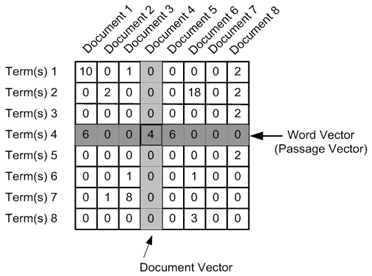


It involves two things:

+ A vocabulary of known words.
+ A measure of the presence of known words.

It is called a “bag” of words, because any information about the order or structure of words in the document is discarded. The model is only concerned with whether known words occur in the document, not where in the document.

In [15]:
'''

CountVectorizer converts the words in the text into a word frequency matrix, 
which counts the number of occurrences of each word through the fit_transform function.

sklearn.feature_extraction.text.CountVectorizer: Convert a collection of text documents to a matrix of token counts.

fit_transform(raw_documents[, y]): Learn the vocabulary dictionary and return document-term matrix.

'''


from sklearn.feature_extraction.text import CountVectorizer

# get bag of words features in sparse format

cv = CountVectorizer(min_df=0., max_df=1.)

'''
min_df: ignore terms that have a document frequency strictly lower than the given threshold
max_df: ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words)

'''

# Return a document - term matrix

cv_matrix = cv.fit_transform(norm_corpus)

cv_matrix

<8x20 sparse matrix of type '<class 'numpy.int64'>'
	with 42 stored elements in Compressed Sparse Row format>

In [16]:

'''
view non-zero feature positions in the sparse matrix
The preceding output tells us the total count for each (x, y) pair.

Here, 
x represents a document and 
y represents a specific word/feature and 
the value is the number of times y occurs in x.

'''

print(cv_matrix)

  (0, 17)	1
  (0, 3)	1
  (0, 2)	1
  (1, 17)	1
  (1, 3)	1
  (1, 2)	1
  (1, 14)	1
  (2, 15)	1
  (2, 5)	1
  (2, 8)	1
  (2, 11)	1
  (2, 13)	1
  (2, 6)	1
  (3, 12)	1
  (3, 4)	1
  (3, 16)	1
  (3, 10)	1
  (3, 0)	1
  (3, 7)	1
  (3, 18)	1
  (3, 1)	1
  (4, 14)	1
  (4, 16)	1
  (4, 10)	1
  (4, 0)	1
  (4, 7)	1
  (4, 9)	1
  (5, 3)	1
  (5, 15)	1
  (5, 5)	1
  (5, 8)	1
  (5, 13)	1
  (5, 6)	1
  (6, 17)	2
  (6, 3)	1
  (6, 2)	1
  (6, 19)	1
  (7, 15)	1
  (7, 5)	1
  (7, 8)	1
  (7, 13)	1
  (7, 6)	1


In [13]:
# cv_matrix.toarray(order=None, out=None): Return a dense ndarray representation of this matrix.

# warning might give a memory error if data is too big


cv_matrix = cv_matrix.toarray()
cv_matrix


array([[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]],
      dtype=int64)

Thus, you can see that these documents have been converted into numeric vectors 
so that each document is represented by one vector (row) in the feature matrix and each 
column represents a unique word as a feature.

In [14]:
# get all unique words in the corpus
vocab = cv.get_feature_names()

# show document feature vectors

pd.DataFrame(cv_matrix, columns=vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0,0
3,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0
4,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0
5,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0
6,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1
7,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0


 if a corpus of documents consists of N unique 
words across all the documents, we would have an N-dimensional vector for each of 
the documents.

### Bag of N-gram models  （to obtain phrases or collection of words)

In addition to individual words, we would also like to account for n-grams
of lengths 2 and 3 to capture both word combinations and some grammatical
sequence effects in our representations.   

N-grams are sequences of tokens (either words or characters), and the easiest
way to represent a text is by keeping track of the frequencies of all the n-grams
in the data.

The Bag of N-Grams model is just an extension of the Bag of Words model that 
leverages N-gram based features.

In [21]:
# ngram_range=(a,b) where a is the minimum and b is the maximum size of ngrams you want to include in your features.
# ngram_range of (1, 1) means only unigrams, (1, 2) means unigrams and bigrams, and (2, 2) means only bigrams.

bv = CountVectorizer(ngram_range=(2,2))

bv_matrix = bv.fit_transform(norm_corpus)

bv_matrix = bv_matrix.toarray()

vocab = bv.get_feature_names()

pd.DataFrame(bv_matrix, columns=vocab)

,bacon eggs,beautiful sky,beautiful today,blue beautiful,blue dog,blue sky,breakfast sausages,brown fox,dog lazy,eggs ham,...,lazy dog,love blue,love green,quick blue,quick brown,sausages bacon,sausages ham,sky beautiful,sky blue,toast beans
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
5,0,0,0,0,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
6,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
7,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# 1, 2 gram

bv2 = CountVectorizer(ngram_range=(1,2))

bv2_matrix = bv2.fit_transform(norm_corpus)

bv2_matrix = bv2_matrix.toarray()

vocab2 = bv2.get_feature_names()

pd.DataFrame(bv2_matrix, columns=vocab2)

,bacon,bacon eggs,beans,beautiful,beautiful sky,beautiful today,blue,blue beautiful,blue dog,blue sky,...,quick brown,sausages,sausages bacon,sausages ham,sky,sky beautiful,sky blue,toast,toast beans,today
0,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,1,0,1,0,0,0
1,0,0,0,1,1,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,1,1,0,0,1,...,0,0,0,0,2,1,1,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Limitations:

It can have too many features.

The feature set becomes too sparse and is computationally expensive

Choose the optimal value of N is not that easy task.

## 2.2 TF-IDF  term frequency-inverse document frequency

When we first look at a corpus, we usually want to know what it is generally
about, and what terms we might want to pay special attention to.

Count vectors are a good start, but they give equal weight to all terms with the
same frequency.  

Frequency alone is not sufficient to find important words. For example, there are words that may occur more naturally and repeatedly in many documents, such as "The", "An", "But", etc. in English. Most of these words serve to link statements and are an integral part of maintaining linguistic coherence. 

**TF-IDF** gives a measure that takes the importance of a word into consideration depending on how frequently it occurs in a document and a corpus.

This way, words that occur frequently, but in every document (such as function words), will receive very low scores


</br>


Mathematically, TD-IDF is the product of two 
metrics and can be represented as follows:  

tfidf = tf * idf

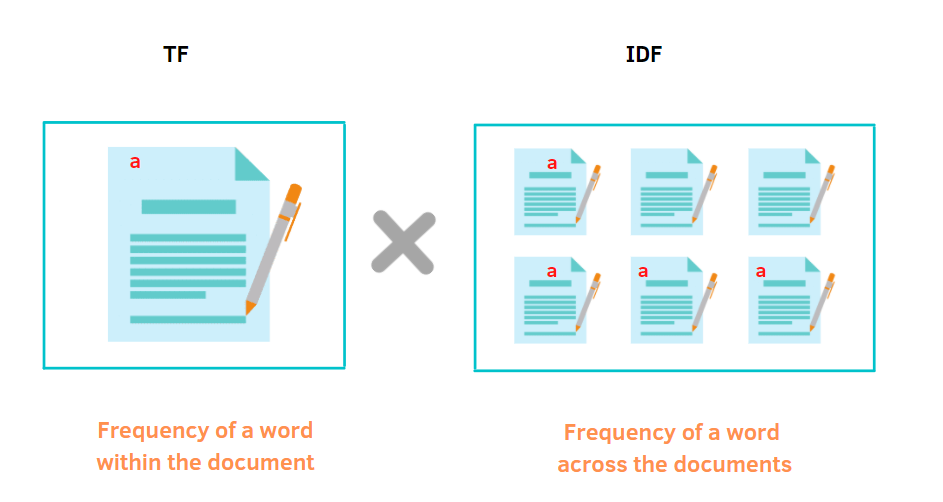



### Term frequency (TF)

Term frequency denotes the frequency of a word in a document, is what we computed in the Bag of Words model in the previous section.

It is the percentage of the number of times a word (x) occurs in a particular document (y) divided by the total number of words in that document.

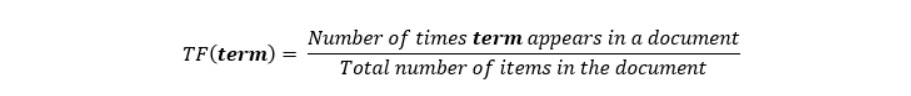

**For Example**, Consider the following document:

Document: Computational social science is difficult to learn. 

For the above sentence, the term frequency value for word *social* will be: tf(‘cat’) = 1 / 7



### Inverse Document Frequency (IDF)


It measures how common a particular word is across all the documents in the corpus.

It is the **logarithmic ratio** of no. of total documents to no. of a document with a particular word.

Basic assumption is: Words that actually carry "relevant" information might be only found in a relatively small number of documents.

Obviously, the more documents that cover a word, the less important that word is, or the less informative that word is.

The application of the inverse expresses the idea that the larger the DF value, the less important it is.

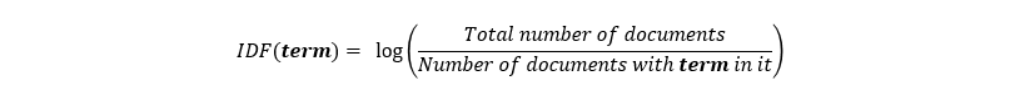

https://www.analyticsvidhya.com/blog/2020/02/quick-introduction-bag-of-words-bow-tf-idf/

##### An example to calculate the TF-IDF scores for all the words in three reviews (a snapshot)

Review 1: This movie is very scary and long  

Review 2: This movie is not scary and is slow  

Review 3: This movie is spooky and good

TF-IDF also gives larger values for less frequent words and is high when both IDF and TF values are high i.e the word is rare in all the documents combined but frequent in a single document.

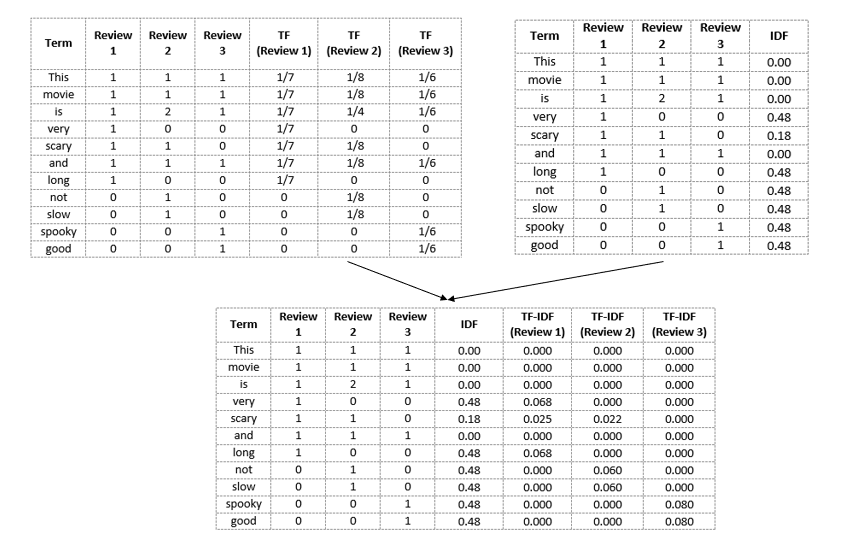

In [25]:
# sklearn.feature_extraction.text.TfidfTransformer: Transform a count matrix to a normalized tf or tf-idf representation.
'''
When you initialize TfidfTransformer, 
you can choose to set it with different parameters. These parameters will change the way you calculate tf–idf.

norm: ‘l2’: Sum of squares of vector elements is 1.‘l1’: Sum of absolute values of vector elements is 1.

use_idf：Enable inverse-document-frequency reweighting

Smooth idf weights by adding one to document frequencies, 
   as if an extra document was seen containing every term in the collection exactly once. 
   Which means,  
   If a word from vocabulary was never seen in the train data, but occures in the test, 
   smooth_idf allows it to be successfully processed.


'''

from sklearn.feature_extraction.text import TfidfTransformer

tt = TfidfTransformer(norm='l2', use_idf=True, smooth_idf=True)

tt_matrix = tt.fit_transform(cv_matrix)

tt_matrix = tt_matrix.toarray()

vocab = cv.get_feature_names()

pd.DataFrame(np.round(tt_matrix, 2), columns=vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0.00,0.00,0.60,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.60,0.00,0.0
1,0.00,0.00,0.49,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.57,0.00,0.00,0.49,0.00,0.0
2,0.00,0.00,0.00,0.00,0.00,0.38,0.38,0.00,0.38,0.00,0.00,0.53,0.00,0.38,0.00,0.38,0.00,0.00,0.00,0.0
3,0.32,0.38,0.00,0.00,0.38,0.00,0.00,0.32,0.00,0.00,0.32,0.00,0.38,0.00,0.00,0.00,0.32,0.00,0.38,0.0
4,0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.39,0.00,0.47,0.39,0.00,0.00,0.00,0.39,0.00,0.39,0.00,0.00,0.0
5,0.00,0.00,0.00,0.37,0.00,0.42,0.42,0.00,0.42,0.00,0.00,0.00,0.00,0.42,0.00,0.42,0.00,0.00,0.00,0.0
6,0.00,0.00,0.36,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.5
7,0.00,0.00,0.00,0.00,0.00,0.45,0.45,0.00,0.45,0.00,0.00,0.00,0.00,0.45,0.00,0.45,0.00,0.00,0.00,0.0


The **TfidfVectorizer** by Scikit-Learn 
enables us to directly compute the tfidf vectors by taking the raw documents as 
input and internally computing the term frequencies as well as the inverse document 
frequencies. 

You don’t always need to generate features beforehand using a Bag of Words or count 
based model before engineering TF-IDF features.

The **main difference between the 2 implementations** is that TfidfVectorizer performs both term frequency and inverse document frequency for you, while using TfidfTransformer will require you to use the CountVectorizer class from Scikit-Learn to perform Term Frequency

A Scikit-Learn provides the implementation of the TfidfVectorizer.

**class sklearn.feature_extraction.text.TfidfVectorizer(*, input='content', lowercase=True, stop_words=None, ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None, norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=False)**


#### Parameters:

input: text document

lowercase : bool(Default-True). Convert all characters to lowercase before tokenizing.

stop_words : Remove the defined words from resulting vocabulary.

ngram_range : The lower and upper boundary of the range of n-values for different n-grams to be extracted.

max_df : Ignore the term that has a document frequency higher than a threshold.

min_df : Ignore the term that has a document frequency lower than a threshold.

max_features : Build a vocabulary that only considers top max_features ordered by word occurrence.

norm : ‘l1’, ‘l2’ or ‘None’ (Default-‘l2’)

use_idf : boolean (default=True). Enable inverse-document-frequency reweighting.

smooth_idf : boolean (default=True). Smooth idf weights by adding one to document frequencies, as if an extra document was seen containing every term in the collection exactly once. Prevents zero divisions.

sublinear_tf : boolean (default=False). Apply sublinear tf scaling, i.e. replace tf with 1 + log(tf).
 

In [62]:

from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0., max_df=1., norm='l2',
                     use_idf=True, smooth_idf=True)

tv_matrix = tv.fit_transform(norm_corpus)
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0.00,0.00,0.60,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.60,0.00,0.0
1,0.00,0.00,0.49,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.57,0.00,0.00,0.49,0.00,0.0
2,0.00,0.00,0.00,0.00,0.00,0.38,0.38,0.00,0.38,0.00,0.00,0.53,0.00,0.38,0.00,0.38,0.00,0.00,0.00,0.0
3,0.32,0.38,0.00,0.00,0.38,0.00,0.00,0.32,0.00,0.00,0.32,0.00,0.38,0.00,0.00,0.00,0.32,0.00,0.38,0.0
4,0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.39,0.00,0.47,0.39,0.00,0.00,0.00,0.39,0.00,0.39,0.00,0.00,0.0
5,0.00,0.00,0.00,0.37,0.00,0.42,0.42,0.00,0.42,0.00,0.00,0.00,0.00,0.42,0.00,0.42,0.00,0.00,0.00,0.0
6,0.00,0.00,0.36,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.5
7,0.00,0.00,0.00,0.00,0.00,0.45,0.45,0.00,0.45,0.00,0.00,0.00,0.00,0.45,0.00,0.45,0.00,0.00,0.00,0.0


### Document Similarity

Document similarity is the process of using a distance or similarity based metric that 
can identify how similar a text document is to any other document(s) based on features 
extracted from the documents, like Bag of Words or TF-IDF. 

If two documents contain nearly the same distribution of words, the vectors they give rise to in the word space would be more parallel than otherwise. 

Pairwise document similarity in a corpus involves computing document similarity 
for each pair of documents in a corpus. Thus, if you have **C** documents in a corpus, 
you would end up with a **C x C** matrix, such that each row and column represents the 
similarity score for a pair of documents. 

There are several similarity and distance metrics that are used 
to compute document similarity. 

#### Cosine similarity is most often used in NLP.

Because cosine similarity is automatically normalized. It is bounded between -1 and 1, similar to a correlation.


#### Implementation in python

In [63]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tv_matrix)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

,0,1,2,3,4,5,6,7
0,1.000000,0.820599,0.000000,0.000000,0.000000,0.192353,0.817246,0.000000
1,0.820599,1.000000,0.000000,0.000000,0.225489,0.157845,0.670631,0.000000
2,0.000000,0.000000,1.000000,0.000000,0.000000,0.791821,0.000000,0.850516
3,0.000000,0.000000,0.000000,1.000000,0.506866,0.000000,0.000000,0.000000
4,0.000000,0.225489,0.000000,0.506866,1.000000,0.000000,0.000000,0.000000
5,0.192353,0.157845,0.791821,0.000000,0.000000,1.000000,0.115488,0.930989
6,0.817246,0.670631,0.000000,0.000000,0.000000,0.115488,1.000000,0.000000
7,0.000000,0.000000,0.850516,0.000000,0.000000,0.930989,0.000000,1.000000


### An example of how to calculate the cosine similarity between two text document.

doc_1 = "Data is the oil of the digital economy" 

doc_2 = "Data is a new oil" 

#### Vector representation of the document

doc_1_vector = [1, 1, 1, 1, 0, 1, 1, 2]

doc_2_vector = [1, 0, 0, 1, 1, 0, 1, 0]

An important point to note here is that the Cosine similarity score usually ranges 
from -1 to +1, but if we use the bag of characters based character frequencies for terms 
or bag of words based word frequencies for documents, the score will range from 0 to 

This is because the frequency vectors can never be negative and hence the angle 
between the two vectors cannot exceed 90∘
.

The Cosine Similarity is a better metric than Euclidean distance because if the two text document far apart by Euclidean distance, there are still chances that they are close to each other in terms of their context.

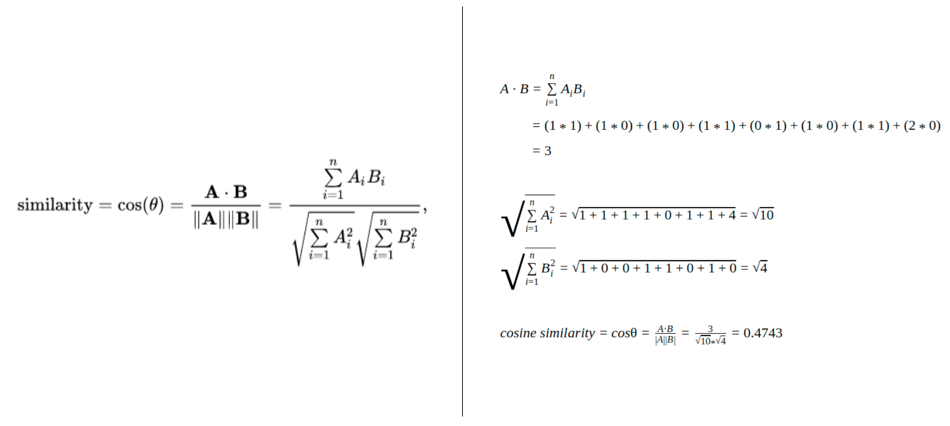

In [88]:
doc_1 = "Data is the oil of the digital economy"
doc_2 = "Data is a new oil"

data = [doc_1, doc_2]

import pandas as pd

def create_dataframe(matrix, tokens):

    doc_names = [f'doc_{i+1}' for i, _ in enumerate(matrix)]
    df = pd.DataFrame(data=matrix, index=doc_names, columns=tokens)
    return(df)

from sklearn.feature_extraction.text import TfidfVectorizer

Tfidf_vect = TfidfVectorizer()
vector_matrix = Tfidf_vect.fit_transform(data)

tokens = Tfidf_vect.get_feature_names()
create_dataframe(vector_matrix.toarray(),tokens)

,data,digital,economy,is,new,of,oil,the
doc_1,0.243777,0.34262,0.34262,0.243777,0.000000,0.34262,0.243777,0.68524
doc_2,0.448321,0.00000,0.00000,0.448321,0.630099,0.00000,0.448321,0.00000


In [89]:
cosine_similarity_matrix = cosine_similarity(vector_matrix)
create_dataframe(cosine_similarity_matrix,['doc_1','doc_2'])

,doc_1,doc_2
doc_1,1.000000,0.327871
doc_2,0.327871,1.000000


### TF-IDF Examples using several text files

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
pd.set_option("max_rows", 600)
from pathlib import Path  
import glob


In [27]:
# Set directory path that contains all the text files that we want to analyze.

directory_path = "C:/Users/kimuj/Documents/Python Scripts/Training/data"

In [28]:
text_files = glob.glob(f"{directory_path}/*.txt")

In [29]:
text_files

['C:/Users/kimuj/Documents/Python Scripts/Training/data\\Data1.txt',
 'C:/Users/kimuj/Documents/Python Scripts/Training/data\\Data2.txt',
 'C:/Users/kimuj/Documents/Python Scripts/Training/data\\Data3.txt']

In [30]:
text_titles = [Path(text).stem for text in text_files]
text_titles

['Data1', 'Data2', 'Data3']

In [31]:
# Initialize TfidfVectorizer with desired parameters (default smoothing and normalization (l2))

tfidf_vectorizer = TfidfVectorizer(input='filename', stop_words='english')

In [32]:
# Run TfidfVectorizer on our text_files

tfidf_vector = tfidf_vectorizer.fit_transform(text_files)

In [33]:
# Make a DataFrame out of the resulting tf–idf vector, setting the “feature names” or words as columns and the titles as rows

tfidf_df = pd.DataFrame(np.round(tfidf_vector.toarray(),2), index=text_titles, columns=tfidf_vectorizer.get_feature_names())

tfidf_df

,1957,2015,83,adjust,adjustments,analysis,appear,appears,based,brown,...,valued,varies,vector,vectors,vocabulary,way,weighting,wish,word,words
Data1,0.12,0.00,0.00,0.00,0.12,0.00,0.00,0.00,0.00,0.25,...,0.00,0.12,0.00,0.00,0.00,0.12,0.09,0.12,0.00,0.07
Data2,0.00,0.08,0.08,0.08,0.00,0.00,0.08,0.08,0.08,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.12,0.00,0.17,0.05
Data3,0.00,0.00,0.00,0.00,0.00,0.11,0.00,0.00,0.00,0.00,...,0.11,0.00,0.34,0.11,0.11,0.00,0.00,0.00,0.34,0.20


In [40]:
# Let’s reorganize the DataFrame so that the words are in rows rather than columns

tfidf_df.stack().reset_index()

,level_0,level_1,0
0,Data1,1957,0.12
1,Data1,2015,0.00
2,Data1,83,0.00
3,Data1,adjust,0.00
4,Data1,adjustments,0.12
5,Data1,analysis,0.00
6,Data1,appear,0.00
7,Data1,appears,0.00
8,Data1,based,0.00
9,Data1,brown,0.25


In [41]:
tfidf_df = tfidf_df.stack().reset_index()

tfidf_df = tfidf_df.rename(columns={0:'tfidf', 'level_0': 'document','level_1': 'term', 'level_2': 'term'})

In [47]:
#To find out the top 10 words with the highest tf–idf for each document


tfidf_df.sort_values(by=['document','tfidf'], ascending=[True,False]).groupby(['document']).head(10)

,document,term,tfidf
27,Data1,documents,0.38
99,Data1,term,0.29
26,Data1,document,0.28
9,Data1,brown,0.25
20,Data1,cow,0.25
69,Data1,occurs,0.25
65,Data1,number,0.19
103,Data1,times,0.19
0,Data1,1957,0.12
4,Data1,adjustments,0.12


In [50]:
top_tfidf = tfidf_df.sort_values(by=['document','tfidf'], ascending=[True,False]).groupby(['document']).head(10)

top_tfidf[top_tfidf['term'].str.contains('words')]

,document,term,tfidf
362,Data3,words,0.2


In [52]:
top_tfidf[top_tfidf['document'].str.contains('Data1')]

,document,term,tfidf
27,Data1,documents,0.38
99,Data1,term,0.29
26,Data1,document,0.28
9,Data1,brown,0.25
20,Data1,cow,0.25
69,Data1,occurs,0.25
65,Data1,number,0.19
103,Data1,times,0.19
0,Data1,1957,0.12
4,Data1,adjustments,0.12


### Visualization

Altair: Declarative Visualization in Python

Altair offers a powerful and concise visualization grammar that enables you to build a wide range of statistical visualizations quickly. 

In [58]:
import altair as alt
import numpy as np

# Terms in this list will get a red dot in the visualization
term_list = ['word', 'term']

# adding a little randomness to break ties in term ranking

top_tfidf_plusRand = top_tfidf.copy()

# shape[0] return the number of rows

top_tfidf_plusRand['tfidf'] = top_tfidf_plusRand['tfidf'] + np.random.rand(top_tfidf.shape[0])*0.0001

In [59]:
top_tfidf_plusRand

,document,term,tfidf
27,Data1,documents,0.380097
99,Data1,term,0.290079
26,Data1,document,0.280069
9,Data1,brown,0.250008
20,Data1,cow,0.250056
69,Data1,occurs,0.250029
65,Data1,number,0.190072
103,Data1,times,0.190020
0,Data1,1957,0.120026
4,Data1,adjustments,0.120079


In [61]:

# base for all visualizations, with rank calculation

base = alt.Chart(top_tfidf_plusRand).encode(
    x = 'rank:O',  # specify ordinal data
    y = 'document:N'# specify nominal data
).transform_window(
    rank = "rank()",
    sort = [alt.SortField("tfidf", order="descending")],
    groupby = ["document"],
)

# Configure heatmap

heatmap = base.mark_rect().encode(
    color = 'tfidf:Q' # specify quantitative data
)

# red circle over terms in above list
# alt.FieldOneOfPredicate: evaluates whether a field is among a list of specified values.

circle = base.mark_circle(size=100).encode(
    color = alt.condition(
        alt.FieldOneOfPredicate(field='term', oneOf=term_list),
        alt.value('red'),
        alt.value('#FFFFFF00')        
    )
)

# text labels, white for darker heatmap colors
# data values are referenced via the name datum

text = base.mark_text(baseline='middle').encode(
    text = 'term:N',
    color = alt.condition(alt.datum.tfidf >= 0.23, alt.value('white'), alt.value('black'))
)

# display the three superimposed visualizations
(heatmap + circle + text).properties(width = 600)


alt.LayerChart(...)

## 2.3 Word2Vec Model

The purpose and usefulness of Word2vec is to group the vectors of similar words together in vectorspace. That is, it detects similarities mathematically. 

The underlying assumption of Word2Vec is that two words sharing similar contexts also share a similar meaning and consequently a similar vector representation from the model.

This model was created by Google in 2013 and is a predictive deep learning based 
model to compute and generate high quality, distributed, and continuous dense vector 
representations of words that capture contextual and semantic similarity. 

Usually, you can specify the size of the 
word embedding vectors and the total number of vectors are essentially the size of the 
vocabulary. This makes the dimensionality of this dense vector space much lower than 
the high-dimensional sparse vector space built using traditional Bag of Words models.

The algorithm iterates over each document in the corpus, and carries out a prediction task. **It selects an input word w and a second,
output word c from the vocabulary. It then tries to predict the output from the
input.**

here are two different model architectures that can be leveraged by Word2Vec to 
create these word embedding representations. These include:

+ **The Continuous Bag of Words (CBOW) model: tries to predict the current target word (the center word) based on the source context words (surrounding words)**

We can model this CBOW architecture as a 
deep learning classification model such that we take in the context words as our input, 
X, and try to predict the target word, Y. 



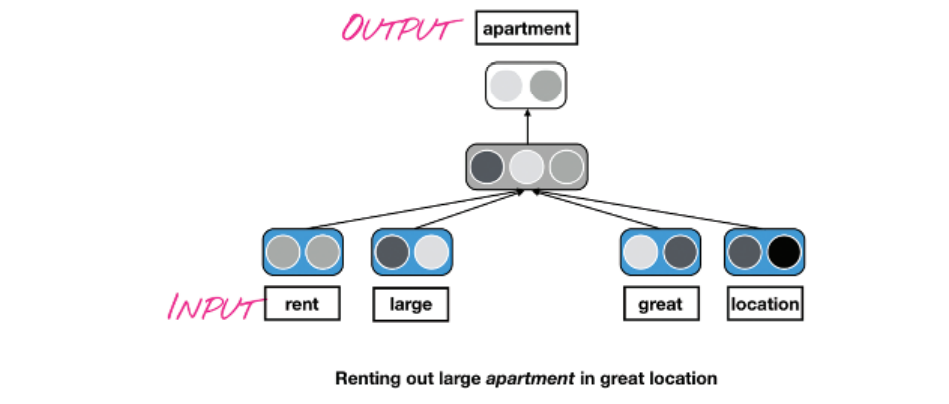



+ **The Skip-Gram model: predict the context word output from the target word input**

As we discussed in the CBOW model, we need to model this Skip-Gram architecture 
as a deep learning classification model, so we take in the target word as our input 
and try to predict the context words.

This becomes slightly complex since we have 
multiple words in our context. We simplify this further by breaking down each 
(target, context _ words) pair into (target, context) pairs so the context consists of only one 
word. 

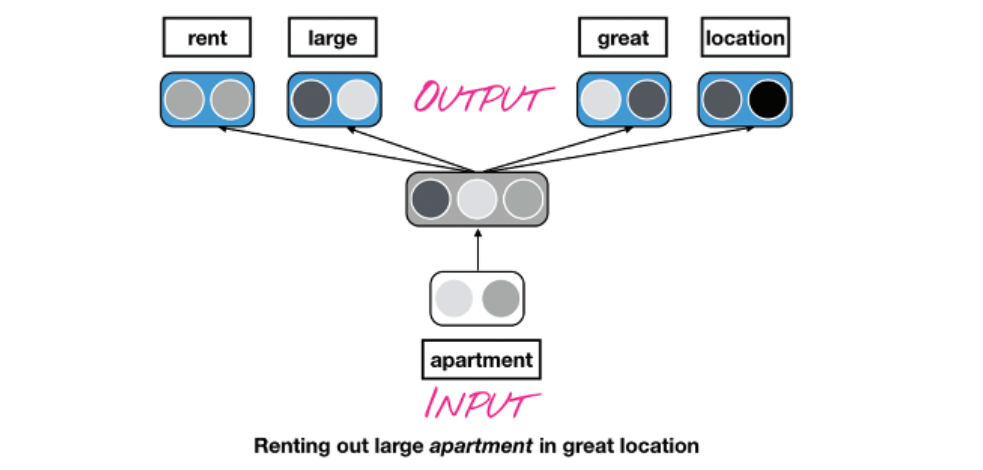

#### word2Vec is a very simple neural network:

Input = text corpus 

Output = vector for each word

Note the bow-tie shape. That is is an autoencoder.

Autoencoders compress sparse representations into dense representation.

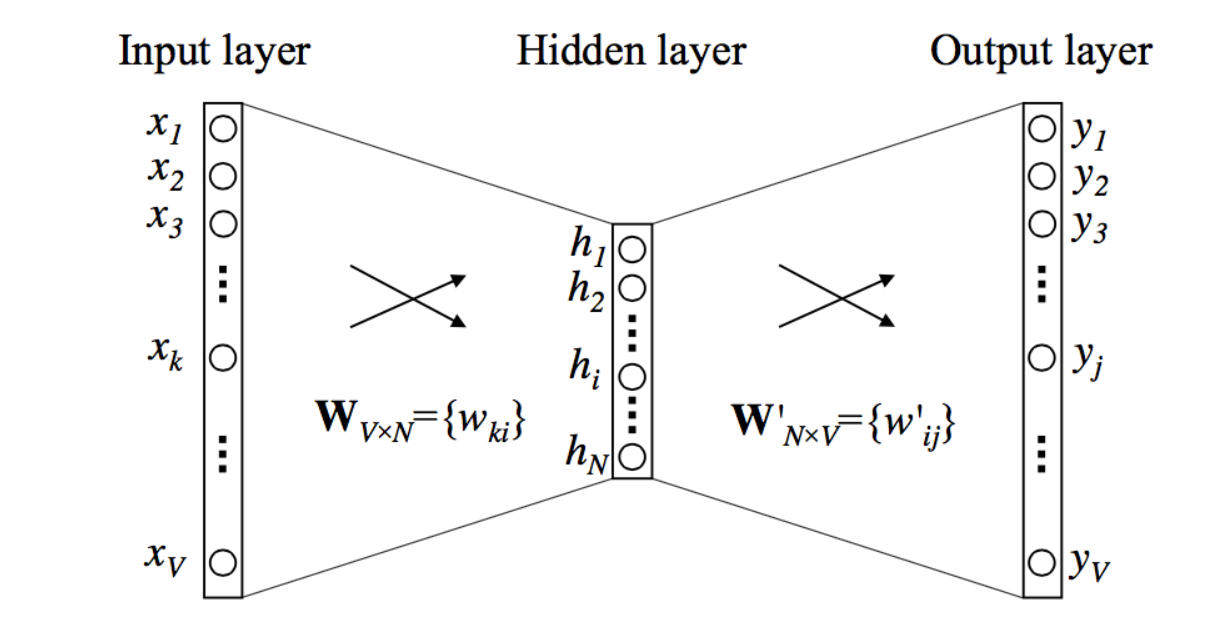

In either case, we keep separate matrices for the target and context versions
of each word, and discard the output matrix in the end.   

#### That is, in the CBOW model, we delete the target word matrix, in the skipgram model, we remove the context word matrix. F

#### Which model to choose?

https://www.guru99.com/word-embedding-word2vec.html

CBOW is several times faster to train than the skip-gram and has slightly better accuracy for frequent words.

Skip-gram works well with a small amount of the training data and well represents rare words.

### Modules

We use gensim, since gensim has a much more readable implementation of Word2Vec (and Doc2Vec). We also use numpy for general array manipulation, and sklearn for Logistic Regression classifier.

https://github.com/linanqiu/word2vec-sentiments/blob/master/word2vec-sentiment.ipynb

### An example

In [70]:
#Natural Language Toolkit

import nltk 

#Gensim = “Generate Similar” is a popular open source natural language processing (NLP) library used for unsupervised topic modeling
from gensim.models import Word2Vec 
from nltk.corpus import stopwords

import re #Regular expression

paragraph = """"The quick brown fox jumps over the lazy dog" is an English-language pangram—a sentence that contains all 
of the letters of the English alphabet. The phrase is commonly used for touch-typing practice, testing typewriters and 
computer keyboards, displaying examples of fonts, and other applications involving text where the use of all letters in 
the alphabet is desired"""

# Preprocessing the data
text = re.sub(r'\[[0-9]*\]',' ',paragraph)
text = re.sub(r'\-',' ',text)
text = text.lower()
text = re.sub(r'\"',' ',text)
text = re.sub(r'\,',' ',text)
text = re.sub(r'\.',' ',text)
text = re.sub(r'\:',' ',text)
#text = re.sub(r'the',' ',text)

# Preparing the dataset
sentences = nltk.sent_tokenize(text)

sentences = [nltk.word_tokenize(sentence) for sentence in sentences]

for i in range(len(sentences)):
    sentences[i] = [word for word in sentences[i] if word not in stopwords.words('english')]
    

In [71]:
sentences

[['quick',
  'brown',
  'fox',
  'jumps',
  'lazy',
  'dog',
  'english',
  'language',
  'pangram—a',
  'sentence',
  'contains',
  'letters',
  'english',
  'alphabet',
  'phrase',
  'commonly',
  'used',
  'touch',
  'typing',
  'practice',
  'testing',
  'typewriters',
  'computer',
  'keyboards',
  'displaying',
  'examples',
  'fonts',
  'applications',
  'involving',
  'text',
  'use',
  'letters',
  'alphabet',
  'desired']]

In [72]:
# Training the Word2Vec model

'''
min_count: This parameter specifies the minimum word count 
needed across the corpus for the word to be considered in the 
vocabulary. 
''' 
model = Word2Vec(sentences, min_count=1)


In [73]:
words = list(model.wv.vocab)
print(words)

['quick', 'brown', 'fox', 'jumps', 'lazy', 'dog', 'english', 'language', 'pangram—a', 'sentence', 'contains', 'letters', 'alphabet', 'phrase', 'commonly', 'used', 'touch', 'typing', 'practice', 'testing', 'typewriters', 'computer', 'keyboards', 'displaying', 'examples', 'fonts', 'applications', 'involving', 'text', 'use', 'desired']


In [74]:
# access vector for one word

print(model['fox'])

[-4.9167480e-03 -2.9111833e-03  1.2080888e-03 -4.7984323e-03
 -2.1478401e-03 -7.9310208e-05  1.8257977e-03  3.5530871e-03
  1.2604791e-03  2.4684479e-03  4.6608220e-03 -2.4398810e-03
  4.1716648e-03 -5.1222340e-04 -3.9329347e-03  4.5209099e-03
  4.6428470e-03  1.1654922e-03  4.5736358e-03  2.4526641e-03
 -3.5651759e-03  3.2196711e-03  5.4315828e-05  2.8963594e-03
 -1.0793684e-03 -1.1677233e-03  4.8186788e-03 -3.3183361e-03
  2.0948455e-03 -4.5079974e-04 -3.8442265e-03  3.2317431e-03
 -2.0390111e-03 -3.2829710e-03  4.3835635e-03 -3.7221853e-03
  1.4447848e-03  1.4464016e-03 -1.7468982e-03 -4.1887211e-03
  5.3115963e-04 -1.5647626e-03 -2.5931301e-03 -2.5079607e-03
 -4.8759808e-03  4.7558583e-03  3.6854711e-03 -1.4127183e-03
  2.6649863e-03 -3.5073608e-03  4.3202033e-03  9.7070093e-04
  1.0676861e-03  3.6107886e-04 -2.4810534e-03 -2.6976832e-03
 -2.1228127e-03 -2.2643746e-03 -1.6880860e-03 -1.5240894e-03
  2.9652915e-03  9.7356742e-04  2.1978279e-03  1.9622019e-03
 -6.1568973e-04 -1.96418

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [75]:
# # view similar words based on gensim's model

similar = model.wv.most_similar('dog')
similar 

[('practice', 0.21658140420913696),
 ('sentence', 0.14256273210048676),
 ('use', 0.14099827408790588),
 ('applications', 0.1332452893257141),
 ('fox', 0.12205617129802704),
 ('jumps', 0.10482414811849594),
 ('lazy', 0.0999339371919632),
 ('commonly', 0.09419301152229309),
 ('computer', 0.08285443484783173),
 ('letters', 0.07744406908750534)]

D:\anaconda\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


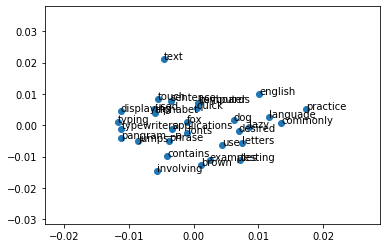

In [81]:
from sklearn.decomposition import PCA

# fit a 2d PCA model to the vectors

X = model[model.wv.vocab]
pca = PCA(n_components=2)

result = pca.fit_transform(X)

# create a scatter plot of the projection

plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()